In [3]:
!conda install --channel conda-forge -y esda

^C

CondaError: KeyboardInterrupt



In [5]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline



In [6]:
gdf = gpd.read_file('districts.geojson')

In [7]:
bl_df = pd.read_csv('CO___FROM_2020-01-01_TO_2020-01-08')
geometry = [Point(xy) for xy in zip(bl_df.longitude, bl_df.latitude)]
crs = {'init': 'epsg:4326'}
bl_gdf = GeoDataFrame(bl_df, crs=crs, geometry=geometry)

/home/ekta/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [8]:
bl_gdf['CO_column_number_density'] = bl_gdf['CO_column_number_density'].astype('float32')
sj_gdf = gpd.sjoin(gdf, bl_gdf, how='inner', op='intersects', lsuffix='left', rsuffix='right')
# median_price_gb = sj_gdf['CO_column_number_density'].groupby([sj_gdf['neighbourhood_group']]).mean()
# median_price_gb

/home/ekta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  


In [9]:
bl_df

,latitude,longitude,CO_column_number_density,geometry
0,8.45,68.75,0.035738,POINT (68.75000 8.45000)
1,8.45,68.85,0.035744,POINT (68.85000 8.45000)
2,8.45,68.95,0.033511,POINT (68.95000 8.45000)
3,8.45,69.05,0.034906,POINT (69.05000 8.45000)
4,8.45,69.15,0.036512,POINT (69.15000 8.45000)
...,...,...,...,...
82639,37.45,96.65,0.019302,POINT (96.65000 37.45000)
82640,37.45,96.75,0.019965,POINT (96.75000 37.45000)
82641,37.45,96.85,0.020373,POINT (96.85000 37.45000)
82642,37.45,96.95,0.019349,POINT (96.95000 37.45000)


In [10]:
bl_df.describe()

,latitude,longitude,CO_column_number_density
count,82644.000000,82644.000000,81256.000000
mean,22.950000,82.900000,0.032913
std,8.400448,8.198373,0.010542
min,8.450000,68.750000,0.010850
25%,15.650000,75.825000,0.024932
50%,22.950000,82.900000,0.037307
75%,30.250000,89.975000,0.040330
max,37.450000,97.050000,0.061653


In [11]:
bl_df[bl_df['CO_column_number_density']>0.05]

,latitude,longitude,CO_column_number_density,geometry
581,8.65,70.05,0.054066,POINT (70.05000 8.65000)
865,8.75,70.05,0.057695,POINT (70.05000 8.75000)
866,8.75,70.15,0.061653,POINT (70.15000 8.75000)
13023,12.95,93.05,0.053096,POINT (93.05000 12.95000)
13613,13.15,95.25,0.052400,POINT (95.25000 13.15000)
15329,13.75,96.45,0.051120,POINT (96.45000 13.75000)
15330,13.75,96.55,0.052311,POINT (96.55000 13.75000)
22148,16.15,96.75,0.051837,POINT (96.75000 16.15000)
22149,16.15,96.85,0.051837,POINT (96.85000 16.15000)
22431,16.25,96.65,0.052624,POINT (96.65000 16.25000)


In [12]:
# india = bl_gdf.plot(column='CO_column_number_density')
# hotspots.plot(ax=india, column='CO_column_number_density')

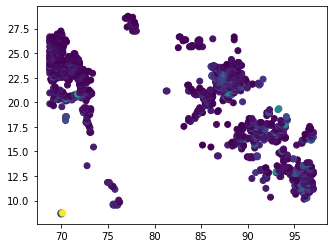

In [13]:
hotspots = bl_gdf[bl_gdf['CO_column_number_density']>0.045]
hotspots.plot(column='CO_column_number_density')

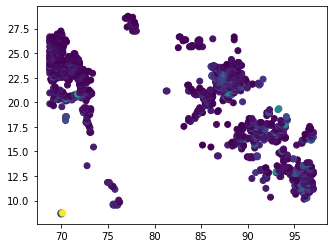

In [14]:
hotspots.plot(column='CO_column_number_density')

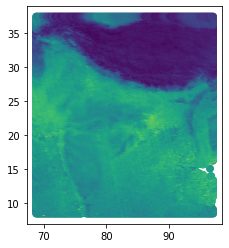

In [15]:
bl_gdf.plot(column='CO_column_number_density')



In [16]:
# hotspots.plot(ax = india, column='CO_column_number_density')

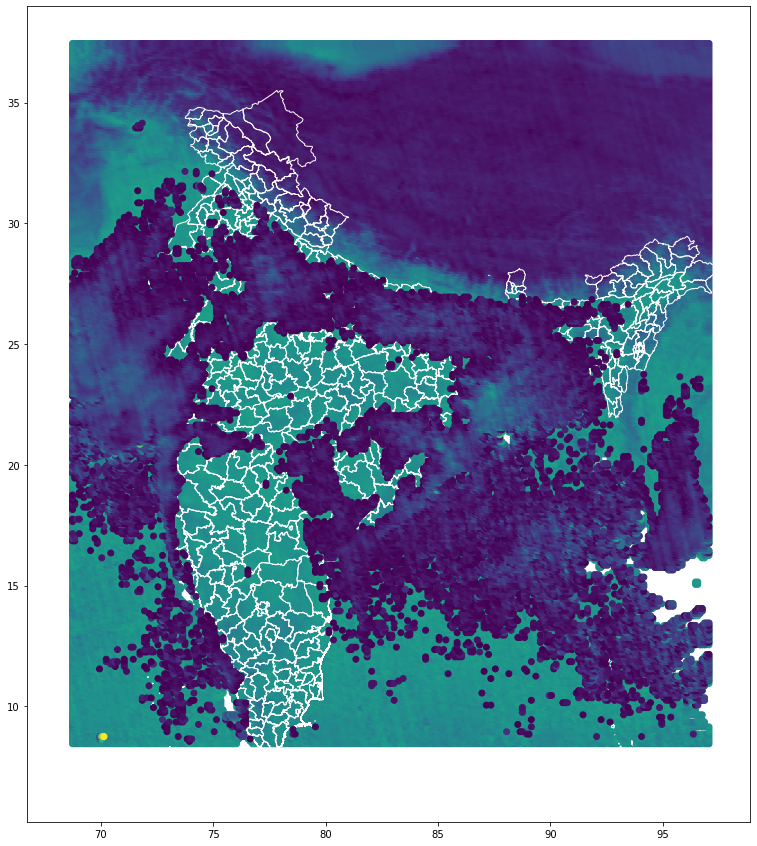

In [17]:
hotspots = bl_gdf[bl_gdf['CO_column_number_density']>0.04]
co = bl_gdf.plot(column='CO_column_number_density',figsize=(15,15))
india = gdf.plot(ax = co, facecolor='none', edgecolor='white')
hotspots.plot(ax = co, column='CO_column_number_density')

In [18]:
bl_gdf['CO_column_number_density']>0.4

0        False
1        False
2        False
3        False
4        False
         ...  
82639    False
82640    False
82641    False
82642    False
82643    False
Name: CO_column_number_density, Length: 82644, dtype: bool

In [19]:
sj_gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry,index_right,latitude,longitude,CO_column_number_density
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10...",14157,13.35,92.85,0.040771
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10...",14442,13.45,92.95,0.041613
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10...",11886,12.55,92.95,0.040874
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10...",11884,12.55,92.75,0.039097
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10...",12170,12.65,92.95,0.039804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,105,IND,India,35,West Bengal,594,West Midnapore,None,Paschim Medinipur,District,District,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",39944,22.45,87.15,0.047903
593,105,IND,India,35,West Bengal,594,West Midnapore,None,Paschim Medinipur,District,District,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",39942,22.45,86.95,0.048081
593,105,IND,India,35,West Bengal,594,West Midnapore,None,Paschim Medinipur,District,District,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",40225,22.55,86.85,0.047069
593,105,IND,India,35,West Bengal,594,West Midnapore,None,Paschim Medinipur,District,District,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",40228,22.55,87.15,0.047946


In [20]:
gdf = gpd.read_file('districts.geojson')

In [21]:
mean_price_gb = sj_gdf['CO_column_number_density'].groupby([sj_gdf['NAME_2']]).mean()

In [22]:
gdf = gdf.join(mean_price_gb, on='NAME_2')

In [23]:
gdf.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry,CO_column_number_density
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10...",0.040138
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,None,None,District,District,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",0.036556
2,105,IND,India,2,Andhra Pradesh,3,Adilabad,None,None,District,District,"POLYGON ((78.33625 19.88319, 78.34669 19.88140...",0.039969
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,None,"Anantpur, Ananthapur",District,District,"POLYGON ((77.69000 15.17628, 77.69378 15.17347...",0.036710
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,None,Chitoor|Chittor,District,District,"POLYGON ((78.47611 13.93680, 78.48208 13.93007...",0.035588


In [24]:
pd.isnull(gdf['CO_column_number_density']).sum()

4

In [25]:
gdf['CO_column_number_density'].fillna((gdf['CO_column_number_density'].mean()), inplace=True)

In [26]:
gdf.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry,CO_column_number_density
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10...",0.040138
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,None,None,District,District,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",0.036556
2,105,IND,India,2,Andhra Pradesh,3,Adilabad,None,None,District,District,"POLYGON ((78.33625 19.88319, 78.34669 19.88140...",0.039969
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,None,"Anantpur, Ananthapur",District,District,"POLYGON ((77.69000 15.17628, 77.69378 15.17347...",0.036710
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,None,Chitoor|Chittor,District,District,"POLYGON ((78.47611 13.93680, 78.48208 13.93007...",0.035588


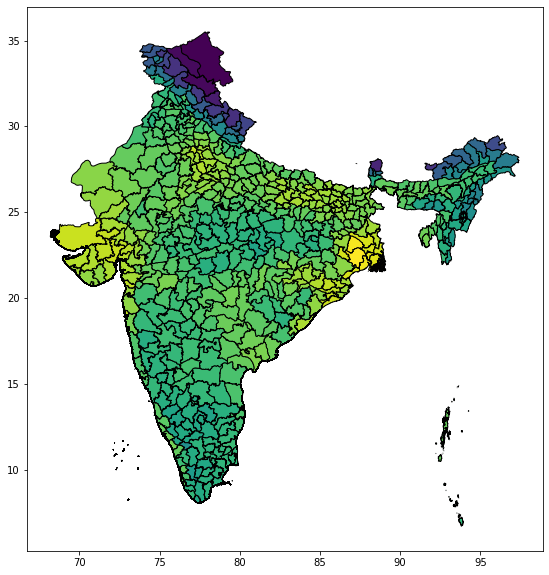

In [27]:
gdf.plot(column='CO_column_number_density', figsize=(10,10), edgecolor='black')

In [28]:
df = gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 256, ' is an island (no neighbors)')


/home/ekta/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 0, 1, 256.
  warnings.warn(message)


In [29]:
y = df['CO_column_number_density']
ylag = lps.weights.lag_spatial(wq, y)

In [30]:
ylag[:10]

array([0.        , 0.        , 0.03974438, 0.0359736 , 0.03644132,
       0.03729612, 0.03953161, 0.03918997, 0.03729635, 0.03935974])

In [31]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

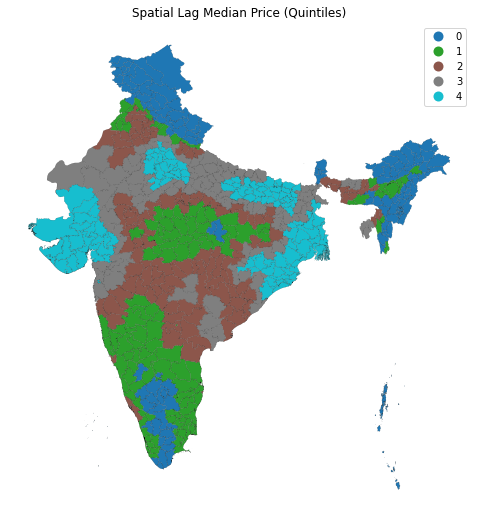

In [32]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, linewidth=0.1, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median Price (Quintiles)")

plt.show()

In [33]:
df.assign(cl=ylagq5.yb)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry,CO_column_number_density,cl
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10...",0.040138,0
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,None,None,District,District,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",0.036556,0
2,105,IND,India,2,Andhra Pradesh,3,Adilabad,None,None,District,District,"POLYGON ((78.33625 19.88319, 78.34669 19.88140...",0.039969,3
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,None,"Anantpur, Ananthapur",District,District,"POLYGON ((77.69000 15.17628, 77.69378 15.17347...",0.036710,1
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,None,Chitoor|Chittor,District,District,"POLYGON ((78.47611 13.93680, 78.48208 13.93007...",0.035588,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,105,IND,India,35,West Bengal,590,North 24 Parganas,None,None,District,District,"MULTIPOLYGON (((88.83472 21.60722, 88.83500 21...",0.045616,4
590,105,IND,India,35,West Bengal,591,Puruliya,None,None,District,District,"POLYGON ((86.89407 23.63799, 86.88847 23.62729...",0.042766,4
591,105,IND,India,35,West Bengal,592,South 24 Parganas,None,None,District,District,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",0.046358,4
592,105,IND,India,35,West Bengal,593,Uttar Dinajpur,None,None,District,District,"MULTIPOLYGON (((88.45847 25.59628, 88.45979 25...",0.041830,3


In [34]:
bl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82644 entries, 0 to 82643
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   latitude                  82644 non-null  float64 
 1   longitude                 82644 non-null  float64 
 2   CO_column_number_density  81256 non-null  float32 
 3   geometry                  82644 non-null  geometry
dtypes: float32(1), float64(2), geometry(1)
memory usage: 2.2 MB


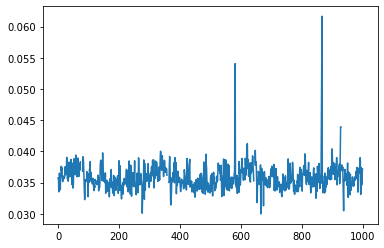

In [35]:
plt.plot(bl_df['CO_column_number_density'][:1000])

In [36]:
# plt.plot(bl_df['geometry'].astype('str'), bl_df['CO_column_number_density'])

In [37]:
# bl_df['geometry'].as_

In [38]:
np.random.seed(12345)

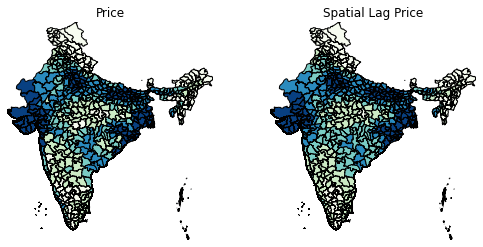

In [39]:
df['lag_median_pri'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='CO_column_number_density', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Price")
df.plot(column='lag_median_pri', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Price")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

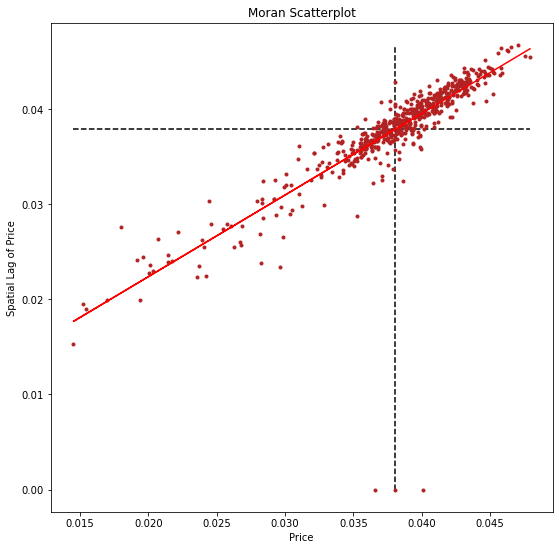

In [40]:
np.random.seed(12345)
wq.transform = 'r'
lag_price = lps.weights.lag_spatial(wq, df['CO_column_number_density'])

price = df['CO_column_number_density']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Price')
plt.xlabel('Price')
plt.show()

In [49]:
y

0      0.040138
1      0.036556
2      0.039969
3      0.036710
4      0.035588
         ...   
589    0.045616
590    0.042766
591    0.046358
592    0.041830
593    0.047938
Name: CO_column_number_density, Length: 594, dtype: float32

In [53]:
# wq.transform?
# esda.moran.Moran_Local?
# from esda.moran import Moran_Local
mi = esda.moran.Moran(y, wq)

In [52]:
# li = esda.moran.Moran_Local(y, wq)

Text(0.5, 0, "Moran's I")

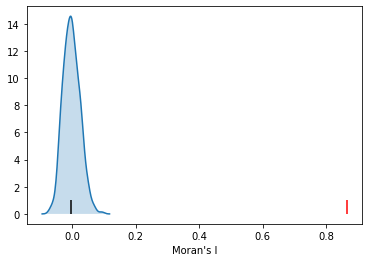

In [54]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [55]:
mi.p_sim

0.001

In [60]:
# y.astype
li = esda.moran.Moran_Local(y, wq)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function matmul>) found for signature:
 
 >>> matmul(array(float32, 2d, C), array(float64, 1d, C))
 
There are 2 candidate implementations:
[1m  - Of which 2 did not match due to:
  Overload in function 'MatMul.generic': File: numba/core/typing/npydecl.py: Line 1009.
    With argument(s): '(array(float32, 2d, C), array(float64, 1d, C))':[0m
[1m   Rejected as the implementation raised a specific error:
     TypingError: [1m'@' arguments must all have the same dtype[0m[0m
  raised from /home/ekta/anaconda3/lib/python3.7/site-packages/numba/core/typing/npydecl.py:955
[0m
[0m[1mDuring: typing of intrinsic-call at /home/ekta/anaconda3/lib/python3.7/site-packages/esda/moran.py (1642)[0m
[1m
File "../../anaconda3/lib/python3.7/site-packages/esda/moran.py", line 1642:[0m
[1mdef _moran_local_crand(i, z, permuted_ids, weights_i, scaling):
    <source elided>
    zi, zrand = _prepare_univariate(i, z, permuted_ids, weights_i)
[1m    return zi * (zrand @ weights_i) * scaling
[0m    [1m^[0m[0m

[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function _moran_local_crand at 0x7f3be9584e60>))[0m
[0m[1mDuring: typing of call at /home/ekta/anaconda3/lib/python3.7/site-packages/esda/crand.py (265)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function _moran_local_crand at 0x7f3be9584e60>))[0m
[0m[1mDuring: typing of call at /home/ekta/anaconda3/lib/python3.7/site-packages/esda/crand.py (265)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function _moran_local_crand at 0x7f3be9584e60>))[0m
[0m[1mDuring: typing of call at /home/ekta/anaconda3/lib/python3.7/site-packages/esda/crand.py (265)
[0m
[1m
File "../../anaconda3/lib/python3.7/site-packages/esda/crand.py", line 265:[0m
[1mdef compute_chunk(
    <source elided>
        ]
[1m        rstats = stat_func(chunk_start + i, z, permuted_ids, weights_i, scaling)
[0m        [1m^[0m[0m
